**Νευρωνικά Δίκτυα - Βαθιά Μάθηση**

Νίκος Κιοσσές

11/2024

###Εισαγωγή βιβλιοθηκών

In [53]:
# Εισαγωγή βιβλιοθηκών
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from tensorflow.keras.datasets import cifar10
from scipy.spatial.distance import cdist
import time
import matplotlib.pyplot as plt

###Κατέβασμα, προετοιμασία και εμφάνιση δεδομένων

In [54]:
# Φόρτωση του CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [55]:
# CIFAR-10 class labels
class_names = [
    "Airplane", "Automobile", "Bird", "Cat", "Deer",
    "Dog", "Frog", "Horse", "Ship", "Truck"
]

In [56]:
# Εκτύπωση του train set
print(x_train)
print("-----------------------------")
print(y_train)

[[[[ 59  62  63]
   [ 43  46  45]
   [ 50  48  43]
   ...
   [158 132 108]
   [152 125 102]
   [148 124 103]]

  [[ 16  20  20]
   [  0   0   0]
   [ 18   8   0]
   ...
   [123  88  55]
   [119  83  50]
   [122  87  57]]

  [[ 25  24  21]
   [ 16   7   0]
   [ 49  27   8]
   ...
   [118  84  50]
   [120  84  50]
   [109  73  42]]

  ...

  [[208 170  96]
   [201 153  34]
   [198 161  26]
   ...
   [160 133  70]
   [ 56  31   7]
   [ 53  34  20]]

  [[180 139  96]
   [173 123  42]
   [186 144  30]
   ...
   [184 148  94]
   [ 97  62  34]
   [ 83  53  34]]

  [[177 144 116]
   [168 129  94]
   [179 142  87]
   ...
   [216 184 140]
   [151 118  84]
   [123  92  72]]]


 [[[154 177 187]
   [126 137 136]
   [105 104  95]
   ...
   [ 91  95  71]
   [ 87  90  71]
   [ 79  81  70]]

  [[140 160 169]
   [145 153 154]
   [125 125 118]
   ...
   [ 96  99  78]
   [ 77  80  62]
   [ 71  73  61]]

  [[140 155 164]
   [139 146 149]
   [115 115 112]
   ...
   [ 79  82  64]
   [ 68  70  55]
   [ 67  69

In [57]:
# Εκτύπωση μίας εικόνας (32*32*3)
# Κάθε σειρά είναι ένα πίξελ και αποτελείται από 3 αριθμούς (RGB)
print(x_train[1])

[[[154 177 187]
  [126 137 136]
  [105 104  95]
  ...
  [ 91  95  71]
  [ 87  90  71]
  [ 79  81  70]]

 [[140 160 169]
  [145 153 154]
  [125 125 118]
  ...
  [ 96  99  78]
  [ 77  80  62]
  [ 71  73  61]]

 [[140 155 164]
  [139 146 149]
  [115 115 112]
  ...
  [ 79  82  64]
  [ 68  70  55]
  [ 67  69  55]]

 ...

 [[175 167 166]
  [156 154 160]
  [154 160 170]
  ...
  [ 42  34  36]
  [ 61  53  57]
  [ 93  83  91]]

 [[165 154 128]
  [156 152 130]
  [159 161 142]
  ...
  [103  93  96]
  [123 114 120]
  [131 121 131]]

 [[163 148 120]
  [158 148 122]
  [163 156 133]
  ...
  [143 133 139]
  [143 134 142]
  [143 133 144]]]


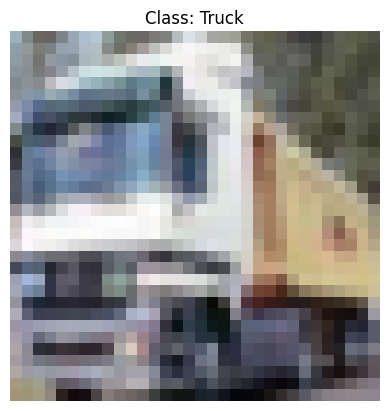

In [58]:
# Εμφάνιση της δεύτερης εικόνας του train set
plt.imshow(x_train[1])
# Εκτύπωση της κλάσης της εικόνας
plt.title(f"Class: {class_names[y_train[1][0]]}")
plt.axis('off')
plt.show()

In [59]:
# Μετατροπή των y_train και y_test σε μονοδιάστατους πίνακες
y_train = y_train.flatten()
y_test = y_test.flatten()

# Προεπεξεργασία δεδομένων: Αναδιαμόρφωση των εικόνων σε μονοδιάστατο πίνακα
x_train = x_train.reshape(x_train.shape[0], -1)
x_test = x_test.reshape(x_test.shape[0], -1)

In [60]:
# Εκτύπωση του train set
print(x_train)
print("-----------------------------")
print(y_train)

[[ 59  62  63 ... 123  92  72]
 [154 177 187 ... 143 133 144]
 [255 255 255 ...  80  86  84]
 ...
 [ 35 178 235 ...  12  31  50]
 [189 211 240 ... 195 190 171]
 [229 229 239 ... 163 163 161]]
-----------------------------
[6 9 9 ... 9 1 1]


Η κάθε εικόνα του CIFAR-10 είναι έγχρωμη, με διαστάσεις 32x32x3.
Όταν αναδιαμορφώνεται σε μονοδιάστατο πίνακα, κάθε εικόνα έχει 3072 τιμές (32 * 32 * 3). Οι τιμές των pixels είναι διατεταγμένες ως εξής:

*   Τα πρώτα 1024 στοιχεία αντιστοιχούν στο κόκκινο κανάλι (Red channel) της εικόνας.
*   Τα επόμενα 1024 στοιχεία αντιστοιχούν στο πράσινο κανάλι (Green channel).
*   Τα τελευταία 1024 στοιχεία αντιστοιχούν στο μπλε κανάλι (Blue channel).



In [61]:
print("Εικόνα 1: ", x_train[1])
print("Αριθμός pixels: ", len(x_train[1]))
print("Red channel: ",x_train[1][0:1024])
print("Green channel: ",x_train[1][1024:2048])
print("Blue channel: ",x_train[1][2048:3072])

Εικόνα 1:  [154 177 187 ... 143 133 144]
Αριθμός pixels:  3072
Red channel:  [154 177 187 ... 195 197 141]
Green channel:  [ 92  75 156 ... 158 131 139]
Blue channel:  [139 231 219 ... 143 133 144]


###1-Nearest Neighbor Classifier

In [62]:
# Δημιουργία του KNN Classifier με k=1 (1 πλησιέστερος γείτονας)
knn1 = KNeighborsClassifier(n_neighbors=1)

In [63]:
# Εκπαίδευση του KNN Classifier στα δεδομένα εκπαίδευσης
knn1.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [64]:
start_time = time.time()

# Πρόβλεψη στα δεδομένα δοκιμών
y_pred = knn1.predict(x_test)

end_time = time.time()
print("Duration: ", end_time - start_time, "seconds")

Duration:  113.53616452217102 seconds


In [65]:
# Υπολογισμός ακρίβειας του μοντέλου
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print(f'Ακρίβεια: {accuracy:.2%}')
print(f'Precision: {precision:.2%}')
print(f'Recall: {recall:.2%}')
print(f'F1 Score: {f1:.2%}')

Ακρίβεια: 35.39%
Precision: 41.12%
Recall: 35.39%
F1 Score: 34.95%


Ο ταξινομητής 1-NN αποφασίζει την κλάση ενός δείγματος αποκλειστικά με βάση τον πιο κοντινό γείτονα. Αυτό σημαίνει ότι είναι πιο ευαίσθητος σε θόρυβο ή τυχαία λάθη στα δεδομένα εκπαίδευσης. Αν το πιο κοντινό σημείο ανήκει σε λάθος κλάση, τότε η πρόβλεψη θα είναι λάθος.

###3-Nearest Neighbors Classifier

In [66]:
# Δημιουργία του KNN Classifier με k=3 (3 πλησιέστερους γείτονες)
knn3 = KNeighborsClassifier(n_neighbors=3)

In [67]:
# Εκπαίδευση του KNN Classifier στα δεδομένα εκπαίδευσης
knn3.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [68]:
start_time = time.time()

# Πρόβλεψη στα δεδομένα δοκιμών
y_pred = knn3.predict(x_test)

end_time = time.time()
print("Duration: ", end_time - start_time, "seconds")

Duration:  113.24484038352966 seconds


In [69]:
# Υπολογισμός ακρίβειας του μοντέλου
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print(f'Ακρίβεια: {accuracy:.2%}')
print(f'Precision: {precision:.2%}')
print(f'Recall: {recall:.2%}')
print(f'F1 Score: {f1:.2%}')

Ακρίβεια: 33.03%
Precision: 43.04%
Recall: 33.03%
F1 Score: 31.92%


Ο ταξινομητής 3-NN λαμβάνει υπόψη του τους 3 πλησιέστερους γείτονες, επομένως η απόφασή του είναι πιο "δημοκρατική". Έτσι, ακόμα και αν ένας από τους τρεις πλησιέστερους γείτονες ανήκει σε λάθος κλάση, οι άλλοι δύο γείτονες μπορεί να το αντισταθμίσουν, κάνοντας την απόφαση πιο αξιόπιστη. Ο 3-NN, λοιπόν, τείνει να είναι πιο ανθεκτικός σε θόρυβο.

###Nearest Centroid Classifier

In [70]:
start_time = time.time()

# Υπολογισμός των κέντρων για κάθε κλάση
centroids = []
for class_id in np.unique(y_train):
    # Υπολογισμός του μέσου όρου για όλα τα δείγματα της συγκεκριμένης κλάσης
    # x_train[y_train == class_id]: Επιλέγει όλα τα δείγματα από το x_train που ανήκουν στην κλάση class_id.
    # .mean(axis=0): Υπολογίζει τον μέσο όρο κατά μήκος των δειγμάτων για κάθε χαρακτηριστικό (pixel) ξεχωριστά.
    # Το αποτέλεσμα είναι ένα μονοδιάστατο διάνυσμα που περιέχει το κέντρο (centroid) της κλάσης.
    # Δηλαδή, για κάθε class_id, υπολογίζουμε ένα κέντρο που αναπαριστά τη "μέση" εικόνα της συγκεκριμένης κλάσης και το αποθηκεύουμε στη μεταβλητή class_centroid.
    class_centroid = x_train[y_train == class_id].mean(axis=0)
    centroids.append(class_centroid)

# Μετατροπή των centroids σε numpy array
centroids = np.array(centroids)

# Υπολογισμός (ευκλείδιων) αποστάσεων από κάθε δείγμα δοκιμής προς τα centroids
distances = cdist(x_test, centroids, metric='euclidean')

# Πρόβλεψη: η κλάση του πλησιέστερου κέντρου για κάθε δείγμα
y_pred = np.argmin(distances, axis=1)

end_time = time.time()
print("Duration: ", end_time - start_time, "seconds")

Duration:  0.6085915565490723 seconds


In [71]:
# Υπολογισμός ακρίβειας του μοντέλου
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print(f'Ακρίβεια: {accuracy:.2%}')
print(f'Precision: {precision:.2%}')
print(f'Recall: {recall:.2%}')
print(f'F1 Score: {f1:.2%}')

Ακρίβεια: 27.74%
Precision: 28.70%
Recall: 27.74%
F1 Score: 25.41%


Ο κατηγοριοποιητής πλησιέστερου κέντρου είναι πολύ γρήγορος στην πρόβλεψη, καθώς συγκρίνει κάθε δείγμα μόνο με τα 10 κέντρα και όχι με όλα τα δείγματα εκπαίδευσης.
Αυτός ο ταξινομητής είναι σχετικά απλός, οπότε η ακρίβεια μπορεί να είναι χαμηλότερη από πιο εξελιγμένους ταξινομητές όπως τα νευρωνικά δίκτυα ή ο K-Nearest Neighbors.

###Παρατηρήσεις

1. Παρατηρούμε ότι η απόδοση τόσο του 3-NN όσο και του 1-NN είναι καλύτερες από την απόδοση του ταξινομητή πλησιέστερου κέντρου στα δεδομένα ελέγχου.

  Αυτό είναι αναμενόμενο καθώς:

*   O KNN χρησιμοποιεί περισσότερη πληροφορία από τα δεδομένα εκπαίδευσης κατά τη διαδικασία της ταξινόμησης αφού λαμβάνει υπόψη του τα χαρακτηριστικά πολλών κοντινών σημείων, κάτι που προσφέρει μεγαλύτερη ακρίβεια και αντιπροσωπευτικότητα.

*   Ο ταξινομητής πλησιέστερου κέντρου χρησιμοποιεί μόνο ένα κέντρο για κάθε κλάση, δηλαδή τον μέσο όρο όλων των δειγμάτων της κλάσης, και αγνοεί την κατανομή των δεδομένων γύρω από το κέντρο.




2. Επίσης, παρατηρούμε ότι οι μετρικές που χρησιμοποιήσαμε δεν ξεπερνούν το 50% σε κανένα μοντέλο.

  Δηλαδή, οι ταξινομητές έχουν σχεδόν τυχαια απόδοση, κάτι που υποδεικνύει πρόβλημα με τα δεδομένα ή την προσέγγιση.

  Χρειάζεται να βελτιώσουμε την προεπεξεργασία ή να επιλέξουμε καλύτερα χαρακτηριστικά.

  Πιθανόν να απαιτούνται άλλες τεχνικές ή πιο εξελιγμένοι ταξινομητές για τη βελτίωση της απόδοσης.

3. Τέλος, παρατηρούμε ότι ο 1-NN με τον 3-NN δεν έχουν σημαντική διαφορά στην απόδοση τους για το συγκεκριμένο test set.

  Θα περιμέναμε ο 3-NN να είναι αρκετά πιο ακριβής με καλύτερο precision, recall και f1-score όμως δεν απέχουν πολύ.
  
  Αυτό σε συνδυασμό με την κακή απόδοση και των δύο, υποδεικνύει πιθανό πρόβλημα με:

  

*   Τη διαχωρισιμότητα των κλάσεων στον χώρο χαρακτηριστικών.
*   Την ποιότητα ή αντιπροσωπευτικότητα των δεδομένων.
*   Τα χρησιμοποιούμενα χαρακτηριστικά και την ανάγκη για προεπεξεργασία όπως κανονικοποίηση ή επιλογή καλύτερων χαρακτηριστικών.